## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  24.469484   623.569285  0.098063   3.859179  1.229990
1   4.213099   378.049801  0.809852   2.010264  1.512126
2  21.475872  1720.130663  0.870452   9.689548  1.530135
3  26.974462  1209.917404  0.162825   9.464952  1.447166
4  17.483261   506.693610  0.154573  10.531113  1.299358


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.91932 | train_mse: 5.5823  | train_mae: 1.79808 |  0:00:00s
epoch 1  | loss: 0.99792 | train_mse: 4.14823 | train_mae: 1.58009 |  0:00:00s
epoch 2  | loss: 0.91687 | train_mse: 3.10954 | train_mae: 1.37258 |  0:00:00s


epoch 3  | loss: 0.72497 | train_mse: 2.55725 | train_mae: 1.24283 |  0:00:00s
epoch 4  | loss: 0.85718 | train_mse: 2.23951 | train_mae: 1.16583 |  0:00:00s


epoch 5  | loss: 0.5828  | train_mse: 1.91425 | train_mae: 1.06724 |  0:00:00s
epoch 6  | loss: 0.63358 | train_mse: 1.68397 | train_mae: 1.00148 |  0:00:00s


epoch 7  | loss: 0.51224 | train_mse: 1.59239 | train_mae: 0.96546 |  0:00:00s
epoch 8  | loss: 0.46982 | train_mse: 1.43739 | train_mae: 0.90568 |  0:00:01s


epoch 9  | loss: 0.47145 | train_mse: 1.49456 | train_mae: 0.89878 |  0:00:01s
epoch 10 | loss: 0.51627 | train_mse: 1.38339 | train_mae: 0.86027 |  0:00:01s
epoch 11 | loss: 0.56028 | train_mse: 1.23078 | train_mae: 0.81318 |  0:00:01s


epoch 12 | loss: 0.41106 | train_mse: 1.13624 | train_mae: 0.7848  |  0:00:01s
epoch 13 | loss: 0.52281 | train_mse: 1.01636 | train_mae: 0.74034 |  0:00:01s
epoch 14 | loss: 0.38632 | train_mse: 0.91524 | train_mae: 0.70905 |  0:00:01s


epoch 15 | loss: 0.48931 | train_mse: 0.83914 | train_mae: 0.68466 |  0:00:01s
epoch 16 | loss: 0.44107 | train_mse: 0.76973 | train_mae: 0.65759 |  0:00:01s


epoch 17 | loss: 0.38594 | train_mse: 0.69311 | train_mae: 0.63056 |  0:00:01s
epoch 18 | loss: 0.42491 | train_mse: 0.65224 | train_mae: 0.61514 |  0:00:02s
epoch 19 | loss: 0.35684 | train_mse: 0.54898 | train_mae: 0.56906 |  0:00:02s


epoch 20 | loss: 0.37734 | train_mse: 0.4875  | train_mae: 0.53547 |  0:00:02s
epoch 21 | loss: 0.35514 | train_mse: 0.45294 | train_mae: 0.51855 |  0:00:02s
epoch 22 | loss: 0.37389 | train_mse: 0.42633 | train_mae: 0.50474 |  0:00:02s


epoch 23 | loss: 0.37167 | train_mse: 0.39419 | train_mae: 0.4877  |  0:00:02s
epoch 24 | loss: 0.36879 | train_mse: 0.35988 | train_mae: 0.4665  |  0:00:02s
epoch 25 | loss: 0.48007 | train_mse: 0.33924 | train_mae: 0.45436 |  0:00:02s


epoch 26 | loss: 0.38666 | train_mse: 0.31787 | train_mae: 0.43912 |  0:00:02s
epoch 27 | loss: 0.26107 | train_mse: 0.30341 | train_mae: 0.42523 |  0:00:02s
epoch 28 | loss: 0.29583 | train_mse: 0.28722 | train_mae: 0.40984 |  0:00:02s


epoch 29 | loss: 0.35058 | train_mse: 0.27543 | train_mae: 0.40033 |  0:00:03s
epoch 30 | loss: 0.38727 | train_mse: 0.2643  | train_mae: 0.39191 |  0:00:03s
epoch 31 | loss: 0.36237 | train_mse: 0.26    | train_mae: 0.38487 |  0:00:03s


epoch 32 | loss: 0.33938 | train_mse: 0.24722 | train_mae: 0.37546 |  0:00:03s
epoch 33 | loss: 0.37805 | train_mse: 0.24908 | train_mae: 0.37188 |  0:00:03s
epoch 34 | loss: 0.2803  | train_mse: 0.23861 | train_mae: 0.36731 |  0:00:03s


epoch 35 | loss: 0.25139 | train_mse: 0.22398 | train_mae: 0.35949 |  0:00:03s
epoch 36 | loss: 0.34418 | train_mse: 0.22503 | train_mae: 0.35957 |  0:00:03s
epoch 37 | loss: 0.40907 | train_mse: 0.22154 | train_mae: 0.35894 |  0:00:03s


epoch 38 | loss: 0.26655 | train_mse: 0.22417 | train_mae: 0.36356 |  0:00:03s
epoch 39 | loss: 0.26402 | train_mse: 0.22335 | train_mae: 0.36454 |  0:00:04s


epoch 40 | loss: 0.25917 | train_mse: 0.21871 | train_mae: 0.36134 |  0:00:04s
epoch 41 | loss: 0.29942 | train_mse: 0.21696 | train_mae: 0.35816 |  0:00:04s
epoch 42 | loss: 0.25549 | train_mse: 0.21187 | train_mae: 0.35466 |  0:00:04s


epoch 43 | loss: 0.27222 | train_mse: 0.20508 | train_mae: 0.3532  |  0:00:04s
epoch 44 | loss: 0.31981 | train_mse: 0.19563 | train_mae: 0.34946 |  0:00:04s
epoch 45 | loss: 0.41673 | train_mse: 0.19141 | train_mae: 0.34844 |  0:00:04s


epoch 46 | loss: 0.24939 | train_mse: 0.19535 | train_mae: 0.35351 |  0:00:04s
epoch 47 | loss: 0.2849  | train_mse: 0.19741 | train_mae: 0.35372 |  0:00:04s
epoch 48 | loss: 0.27679 | train_mse: 0.19551 | train_mae: 0.35209 |  0:00:04s


epoch 49 | loss: 0.29322 | train_mse: 0.18522 | train_mae: 0.33922 |  0:00:04s
epoch 50 | loss: 0.24472 | train_mse: 0.17736 | train_mae: 0.32837 |  0:00:04s


epoch 51 | loss: 0.22555 | train_mse: 0.17154 | train_mae: 0.3211  |  0:00:05s
epoch 52 | loss: 0.6034  | train_mse: 0.171   | train_mae: 0.32084 |  0:00:05s
epoch 53 | loss: 0.27527 | train_mse: 0.17331 | train_mae: 0.32547 |  0:00:05s


epoch 54 | loss: 0.25064 | train_mse: 0.17261 | train_mae: 0.32331 |  0:00:05s
epoch 55 | loss: 0.2783  | train_mse: 0.17101 | train_mae: 0.32068 |  0:00:05s
epoch 56 | loss: 0.23494 | train_mse: 0.17011 | train_mae: 0.31977 |  0:00:05s


epoch 57 | loss: 0.5032  | train_mse: 0.17007 | train_mae: 0.31972 |  0:00:05s
epoch 58 | loss: 0.23205 | train_mse: 0.17023 | train_mae: 0.31957 |  0:00:05s
epoch 59 | loss: 0.2014  | train_mse: 0.17007 | train_mae: 0.32044 |  0:00:05s


epoch 60 | loss: 0.2636  | train_mse: 0.16792 | train_mae: 0.318   |  0:00:05s
epoch 61 | loss: 0.2339  | train_mse: 0.16498 | train_mae: 0.31677 |  0:00:06s


epoch 62 | loss: 0.24683 | train_mse: 0.16199 | train_mae: 0.31172 |  0:00:06s
epoch 63 | loss: 0.20362 | train_mse: 0.15991 | train_mae: 0.30747 |  0:00:06s
epoch 64 | loss: 0.34889 | train_mse: 0.16109 | train_mae: 0.3062  |  0:00:06s


epoch 65 | loss: 0.31665 | train_mse: 0.16188 | train_mae: 0.30756 |  0:00:06s
epoch 66 | loss: 0.42878 | train_mse: 0.1614  | train_mae: 0.30885 |  0:00:06s
epoch 67 | loss: 0.1971  | train_mse: 0.15878 | train_mae: 0.30669 |  0:00:06s


epoch 68 | loss: 0.21452 | train_mse: 0.15573 | train_mae: 0.30575 |  0:00:06s
epoch 69 | loss: 0.16006 | train_mse: 0.1508  | train_mae: 0.30367 |  0:00:06s
epoch 70 | loss: 0.20664 | train_mse: 0.14792 | train_mae: 0.30086 |  0:00:06s


epoch 71 | loss: 0.30456 | train_mse: 0.13918 | train_mae: 0.28835 |  0:00:06s
epoch 72 | loss: 0.21022 | train_mse: 0.13437 | train_mae: 0.28    |  0:00:07s


epoch 73 | loss: 0.16118 | train_mse: 0.13183 | train_mae: 0.27581 |  0:00:07s
epoch 74 | loss: 0.23732 | train_mse: 0.13241 | train_mae: 0.2765  |  0:00:07s
epoch 75 | loss: 0.26803 | train_mse: 0.13219 | train_mae: 0.27614 |  0:00:07s


epoch 76 | loss: 0.1636  | train_mse: 0.13298 | train_mae: 0.27561 |  0:00:07s
epoch 77 | loss: 0.26749 | train_mse: 0.13397 | train_mae: 0.27546 |  0:00:07s
epoch 78 | loss: 0.2508  | train_mse: 0.1351  | train_mae: 0.27668 |  0:00:07s


epoch 79 | loss: 0.2563  | train_mse: 0.13712 | train_mae: 0.28071 |  0:00:07s
epoch 80 | loss: 0.27734 | train_mse: 0.13355 | train_mae: 0.27647 |  0:00:07s
epoch 81 | loss: 0.18338 | train_mse: 0.13102 | train_mae: 0.27588 |  0:00:07s


epoch 82 | loss: 0.20669 | train_mse: 0.12599 | train_mae: 0.27282 |  0:00:07s
epoch 83 | loss: 0.21911 | train_mse: 0.1238  | train_mae: 0.27264 |  0:00:07s


epoch 84 | loss: 0.20287 | train_mse: 0.12118 | train_mae: 0.2706  |  0:00:08s
epoch 85 | loss: 0.42603 | train_mse: 0.11935 | train_mae: 0.26874 |  0:00:08s
epoch 86 | loss: 0.36842 | train_mse: 0.11925 | train_mae: 0.26794 |  0:00:08s


epoch 87 | loss: 0.16886 | train_mse: 0.1195  | train_mae: 0.26875 |  0:00:08s
epoch 88 | loss: 0.11924 | train_mse: 0.11862 | train_mae: 0.26957 |  0:00:08s
epoch 89 | loss: 0.1905  | train_mse: 0.11759 | train_mae: 0.26882 |  0:00:08s


epoch 90 | loss: 0.17296 | train_mse: 0.11517 | train_mae: 0.26506 |  0:00:08s
epoch 91 | loss: 0.22604 | train_mse: 0.11311 | train_mae: 0.26151 |  0:00:08s
epoch 92 | loss: 0.23866 | train_mse: 0.11223 | train_mae: 0.25971 |  0:00:08s


epoch 93 | loss: 0.23124 | train_mse: 0.10986 | train_mae: 0.25633 |  0:00:08s
epoch 94 | loss: 0.12713 | train_mse: 0.1093  | train_mae: 0.25649 |  0:00:08s


epoch 95 | loss: 0.18824 | train_mse: 0.10845 | train_mae: 0.25742 |  0:00:09s
epoch 96 | loss: 0.22085 | train_mse: 0.10511 | train_mae: 0.25375 |  0:00:09s
epoch 97 | loss: 0.20414 | train_mse: 0.10332 | train_mae: 0.24922 |  0:00:09s
epoch 98 | loss: 0.17528 | train_mse: 0.1034  | train_mae: 0.25041 |  0:00:09s


epoch 99 | loss: 0.31718 | train_mse: 0.10186 | train_mae: 0.2471  |  0:00:09s
epoch 100| loss: 0.24939 | train_mse: 0.1012  | train_mae: 0.24458 |  0:00:09s
epoch 101| loss: 0.19638 | train_mse: 0.09984 | train_mae: 0.24094 |  0:00:09s


epoch 102| loss: 0.22051 | train_mse: 0.09987 | train_mae: 0.24069 |  0:00:09s
epoch 103| loss: 0.16366 | train_mse: 0.09932 | train_mae: 0.24062 |  0:00:09s
epoch 104| loss: 0.13304 | train_mse: 0.09738 | train_mae: 0.23886 |  0:00:09s


epoch 105| loss: 0.22097 | train_mse: 0.09656 | train_mae: 0.23908 |  0:00:09s
epoch 106| loss: 0.31374 | train_mse: 0.09816 | train_mae: 0.24218 |  0:00:10s
epoch 107| loss: 0.18341 | train_mse: 0.09767 | train_mae: 0.24083 |  0:00:10s


epoch 108| loss: 0.18951 | train_mse: 0.09888 | train_mae: 0.24249 |  0:00:10s
epoch 109| loss: 0.20376 | train_mse: 0.09653 | train_mae: 0.23735 |  0:00:10s
epoch 110| loss: 0.13752 | train_mse: 0.09559 | train_mae: 0.2382  |  0:00:10s


epoch 111| loss: 0.20776 | train_mse: 0.09504 | train_mae: 0.23724 |  0:00:10s
epoch 112| loss: 0.14569 | train_mse: 0.09931 | train_mae: 0.24142 |  0:00:10s
epoch 113| loss: 0.16635 | train_mse: 0.09868 | train_mae: 0.23921 |  0:00:10s


epoch 114| loss: 0.21864 | train_mse: 0.09795 | train_mae: 0.23739 |  0:00:10s
epoch 115| loss: 0.17315 | train_mse: 0.09249 | train_mae: 0.23131 |  0:00:10s
epoch 116| loss: 0.14613 | train_mse: 0.09028 | train_mae: 0.22957 |  0:00:10s


epoch 117| loss: 0.26998 | train_mse: 0.08615 | train_mae: 0.22419 |  0:00:11s
epoch 118| loss: 0.14033 | train_mse: 0.08402 | train_mae: 0.22236 |  0:00:11s
epoch 119| loss: 0.18849 | train_mse: 0.08313 | train_mae: 0.22099 |  0:00:11s


epoch 120| loss: 0.18872 | train_mse: 0.0826  | train_mae: 0.22243 |  0:00:11s
epoch 121| loss: 0.13348 | train_mse: 0.08465 | train_mae: 0.22854 |  0:00:11s
epoch 122| loss: 0.19551 | train_mse: 0.08608 | train_mae: 0.23376 |  0:00:11s


epoch 123| loss: 0.18195 | train_mse: 0.08662 | train_mae: 0.23558 |  0:00:11s
epoch 124| loss: 0.08767 | train_mse: 0.08607 | train_mae: 0.23486 |  0:00:11s
epoch 125| loss: 0.11309 | train_mse: 0.08334 | train_mae: 0.22977 |  0:00:11s


epoch 126| loss: 0.15067 | train_mse: 0.08269 | train_mae: 0.22472 |  0:00:11s
epoch 127| loss: 0.1519  | train_mse: 0.08164 | train_mae: 0.22136 |  0:00:11s
epoch 128| loss: 0.20934 | train_mse: 0.08227 | train_mae: 0.22223 |  0:00:12s


epoch 129| loss: 0.24398 | train_mse: 0.0793  | train_mae: 0.21622 |  0:00:12s
epoch 130| loss: 0.12561 | train_mse: 0.0778  | train_mae: 0.21213 |  0:00:12s
epoch 131| loss: 0.12698 | train_mse: 0.07539 | train_mae: 0.20711 |  0:00:12s


epoch 132| loss: 0.15172 | train_mse: 0.07394 | train_mae: 0.2065  |  0:00:12s
epoch 133| loss: 0.1825  | train_mse: 0.07527 | train_mae: 0.21212 |  0:00:12s
epoch 134| loss: 0.11649 | train_mse: 0.07661 | train_mae: 0.21565 |  0:00:12s


epoch 135| loss: 0.16992 | train_mse: 0.07691 | train_mae: 0.21793 |  0:00:12s
epoch 136| loss: 0.34952 | train_mse: 0.07852 | train_mae: 0.2219  |  0:00:12s
epoch 137| loss: 0.13067 | train_mse: 0.08007 | train_mae: 0.22384 |  0:00:12s


epoch 138| loss: 0.18897 | train_mse: 0.07997 | train_mae: 0.2238  |  0:00:12s
epoch 139| loss: 0.15687 | train_mse: 0.08067 | train_mae: 0.22517 |  0:00:13s


epoch 140| loss: 0.14331 | train_mse: 0.07992 | train_mae: 0.22275 |  0:00:13s
epoch 141| loss: 0.1504  | train_mse: 0.08105 | train_mae: 0.22475 |  0:00:13s
epoch 142| loss: 0.14449 | train_mse: 0.0818  | train_mae: 0.22508 |  0:00:13s


epoch 143| loss: 0.12225 | train_mse: 0.08148 | train_mae: 0.22526 |  0:00:13s
epoch 144| loss: 0.12487 | train_mse: 0.07959 | train_mae: 0.22347 |  0:00:13s
epoch 145| loss: 0.14249 | train_mse: 0.0789  | train_mae: 0.22253 |  0:00:13s


epoch 146| loss: 0.18807 | train_mse: 0.07643 | train_mae: 0.21778 |  0:00:13s
epoch 147| loss: 0.28329 | train_mse: 0.07462 | train_mae: 0.21261 |  0:00:13s
epoch 148| loss: 0.12482 | train_mse: 0.07456 | train_mae: 0.21075 |  0:00:13s


epoch 149| loss: 0.16615 | train_mse: 0.07229 | train_mae: 0.20523 |  0:00:14s
epoch 150| loss: 0.14946 | train_mse: 0.06962 | train_mae: 0.20061 |  0:00:14s
epoch 151| loss: 0.13633 | train_mse: 0.06687 | train_mae: 0.19549 |  0:00:14s


epoch 152| loss: 0.15184 | train_mse: 0.06568 | train_mae: 0.19401 |  0:00:14s
epoch 153| loss: 0.11676 | train_mse: 0.06574 | train_mae: 0.19572 |  0:00:14s
epoch 154| loss: 0.09785 | train_mse: 0.06818 | train_mae: 0.20284 |  0:00:14s


epoch 155| loss: 0.18785 | train_mse: 0.06714 | train_mae: 0.20059 |  0:00:14s
epoch 156| loss: 0.32046 | train_mse: 0.06807 | train_mae: 0.20103 |  0:00:14s
epoch 157| loss: 0.10187 | train_mse: 0.06903 | train_mae: 0.20235 |  0:00:14s


epoch 158| loss: 0.10499 | train_mse: 0.06722 | train_mae: 0.20098 |  0:00:14s
epoch 159| loss: 0.19274 | train_mse: 0.06459 | train_mae: 0.19724 |  0:00:14s
epoch 160| loss: 0.08737 | train_mse: 0.06139 | train_mae: 0.19185 |  0:00:15s


epoch 161| loss: 0.15518 | train_mse: 0.06029 | train_mae: 0.18829 |  0:00:15s
epoch 162| loss: 0.11215 | train_mse: 0.06152 | train_mae: 0.1933  |  0:00:15s
epoch 163| loss: 0.10757 | train_mse: 0.06217 | train_mae: 0.19375 |  0:00:15s


epoch 164| loss: 0.25044 | train_mse: 0.06395 | train_mae: 0.19538 |  0:00:15s
epoch 165| loss: 0.14508 | train_mse: 0.06589 | train_mae: 0.19785 |  0:00:15s
epoch 166| loss: 0.12105 | train_mse: 0.06613 | train_mae: 0.19714 |  0:00:15s


epoch 167| loss: 0.14246 | train_mse: 0.06685 | train_mae: 0.199   |  0:00:15s
epoch 168| loss: 0.11409 | train_mse: 0.06582 | train_mae: 0.1979  |  0:00:15s
epoch 169| loss: 0.1336  | train_mse: 0.06576 | train_mae: 0.19811 |  0:00:15s


epoch 170| loss: 0.17285 | train_mse: 0.06803 | train_mae: 0.20181 |  0:00:15s
epoch 171| loss: 0.10739 | train_mse: 0.06858 | train_mae: 0.20258 |  0:00:16s


epoch 172| loss: 0.10699 | train_mse: 0.06868 | train_mae: 0.2034  |  0:00:16s
epoch 173| loss: 0.11975 | train_mse: 0.06965 | train_mae: 0.20411 |  0:00:16s
epoch 174| loss: 0.14807 | train_mse: 0.0701  | train_mae: 0.20546 |  0:00:16s


epoch 175| loss: 0.14039 | train_mse: 0.06614 | train_mae: 0.20084 |  0:00:16s
epoch 176| loss: 0.1908  | train_mse: 0.06455 | train_mae: 0.19866 |  0:00:16s
epoch 177| loss: 0.12921 | train_mse: 0.06182 | train_mae: 0.19371 |  0:00:16s


epoch 178| loss: 0.2151  | train_mse: 0.05919 | train_mae: 0.18948 |  0:00:16s
epoch 179| loss: 0.17039 | train_mse: 0.05852 | train_mae: 0.18798 |  0:00:16s
epoch 180| loss: 0.11777 | train_mse: 0.05769 | train_mae: 0.18687 |  0:00:16s


epoch 181| loss: 0.10268 | train_mse: 0.06023 | train_mae: 0.18816 |  0:00:16s
epoch 182| loss: 0.11783 | train_mse: 0.06326 | train_mae: 0.18749 |  0:00:17s


epoch 183| loss: 0.24416 | train_mse: 0.0621  | train_mae: 0.18318 |  0:00:17s
epoch 184| loss: 0.1685  | train_mse: 0.05953 | train_mae: 0.18051 |  0:00:17s
epoch 185| loss: 0.18474 | train_mse: 0.05651 | train_mae: 0.17997 |  0:00:17s


epoch 186| loss: 0.13886 | train_mse: 0.05412 | train_mae: 0.17826 |  0:00:17s
epoch 187| loss: 0.15229 | train_mse: 0.05336 | train_mae: 0.17834 |  0:00:17s
epoch 188| loss: 0.1109  | train_mse: 0.05261 | train_mae: 0.18016 |  0:00:17s


epoch 189| loss: 0.13226 | train_mse: 0.05327 | train_mae: 0.18247 |  0:00:17s
epoch 190| loss: 0.21881 | train_mse: 0.05616 | train_mae: 0.18705 |  0:00:17s
epoch 191| loss: 0.07867 | train_mse: 0.0594  | train_mae: 0.19091 |  0:00:17s


epoch 192| loss: 0.12554 | train_mse: 0.06337 | train_mae: 0.19476 |  0:00:17s
epoch 193| loss: 0.15978 | train_mse: 0.06557 | train_mae: 0.19616 |  0:00:17s
epoch 194| loss: 0.09883 | train_mse: 0.06543 | train_mae: 0.19408 |  0:00:18s


epoch 195| loss: 0.12572 | train_mse: 0.06525 | train_mae: 0.19278 |  0:00:18s
epoch 196| loss: 0.2298  | train_mse: 0.06476 | train_mae: 0.1923  |  0:00:18s
epoch 197| loss: 0.09342 | train_mse: 0.06494 | train_mae: 0.1928  |  0:00:18s


epoch 198| loss: 0.09922 | train_mse: 0.06445 | train_mae: 0.19251 |  0:00:18s
epoch 199| loss: 0.0662  | train_mse: 0.06428 | train_mae: 0.19496 |  0:00:18s
epoch 200| loss: 0.10355 | train_mse: 0.06294 | train_mae: 0.1941  |  0:00:18s


epoch 201| loss: 0.08404 | train_mse: 0.06075 | train_mae: 0.19286 |  0:00:18s
epoch 202| loss: 0.10444 | train_mse: 0.0591  | train_mae: 0.19221 |  0:00:18s
epoch 203| loss: 0.11466 | train_mse: 0.05749 | train_mae: 0.1915  |  0:00:18s


epoch 204| loss: 0.10637 | train_mse: 0.05589 | train_mae: 0.18931 |  0:00:18s
epoch 205| loss: 0.24505 | train_mse: 0.05624 | train_mae: 0.18922 |  0:00:18s
epoch 206| loss: 0.08846 | train_mse: 0.05836 | train_mae: 0.19255 |  0:00:19s


epoch 207| loss: 0.10479 | train_mse: 0.05889 | train_mae: 0.193   |  0:00:19s
epoch 208| loss: 0.16633 | train_mse: 0.05724 | train_mae: 0.19045 |  0:00:19s
epoch 209| loss: 0.10496 | train_mse: 0.05781 | train_mae: 0.19119 |  0:00:19s


epoch 210| loss: 0.11741 | train_mse: 0.05778 | train_mae: 0.19089 |  0:00:19s
epoch 211| loss: 0.12477 | train_mse: 0.05725 | train_mae: 0.18988 |  0:00:19s
epoch 212| loss: 0.13164 | train_mse: 0.05601 | train_mae: 0.18974 |  0:00:19s


epoch 213| loss: 0.1559  | train_mse: 0.05543 | train_mae: 0.19021 |  0:00:19s
epoch 214| loss: 0.0979  | train_mse: 0.05442 | train_mae: 0.18806 |  0:00:19s
epoch 215| loss: 0.07085 | train_mse: 0.05394 | train_mae: 0.18781 |  0:00:19s


epoch 216| loss: 0.08612 | train_mse: 0.05306 | train_mae: 0.18613 |  0:00:19s
epoch 217| loss: 0.1327  | train_mse: 0.05007 | train_mae: 0.18156 |  0:00:20s


epoch 218| loss: 0.06166 | train_mse: 0.04874 | train_mae: 0.17884 |  0:00:20s
epoch 219| loss: 0.10209 | train_mse: 0.04717 | train_mae: 0.17498 |  0:00:20s
epoch 220| loss: 0.10801 | train_mse: 0.04564 | train_mae: 0.17127 |  0:00:20s


epoch 221| loss: 0.13971 | train_mse: 0.04498 | train_mae: 0.17    |  0:00:20s
epoch 222| loss: 0.14568 | train_mse: 0.04516 | train_mae: 0.17149 |  0:00:20s
epoch 223| loss: 0.24022 | train_mse: 0.04513 | train_mae: 0.17228 |  0:00:20s


epoch 224| loss: 0.17714 | train_mse: 0.04684 | train_mae: 0.17613 |  0:00:20s
epoch 225| loss: 0.07084 | train_mse: 0.04934 | train_mae: 0.1801  |  0:00:20s
epoch 226| loss: 0.0773  | train_mse: 0.04994 | train_mae: 0.1809  |  0:00:20s


epoch 227| loss: 0.18009 | train_mse: 0.04989 | train_mae: 0.18113 |  0:00:20s
epoch 228| loss: 0.11029 | train_mse: 0.05067 | train_mae: 0.18122 |  0:00:21s


epoch 229| loss: 0.12327 | train_mse: 0.05291 | train_mae: 0.18278 |  0:00:21s
epoch 230| loss: 0.09099 | train_mse: 0.05188 | train_mae: 0.18089 |  0:00:21s
epoch 231| loss: 0.21573 | train_mse: 0.05203 | train_mae: 0.18065 |  0:00:21s


epoch 232| loss: 0.12832 | train_mse: 0.05102 | train_mae: 0.17986 |  0:00:21s
epoch 233| loss: 0.28969 | train_mse: 0.05131 | train_mae: 0.18086 |  0:00:21s
epoch 234| loss: 0.07984 | train_mse: 0.05166 | train_mae: 0.18006 |  0:00:21s


epoch 235| loss: 0.23385 | train_mse: 0.05315 | train_mae: 0.18071 |  0:00:21s
epoch 236| loss: 0.11874 | train_mse: 0.05458 | train_mae: 0.18211 |  0:00:21s
epoch 237| loss: 0.10799 | train_mse: 0.05448 | train_mae: 0.18154 |  0:00:21s


epoch 238| loss: 0.06799 | train_mse: 0.05236 | train_mae: 0.17837 |  0:00:21s
epoch 239| loss: 0.11617 | train_mse: 0.04904 | train_mae: 0.17489 |  0:00:21s


epoch 240| loss: 0.12192 | train_mse: 0.04605 | train_mae: 0.16973 |  0:00:22s
epoch 241| loss: 0.08172 | train_mse: 0.04375 | train_mae: 0.16455 |  0:00:22s
epoch 242| loss: 0.20495 | train_mse: 0.04241 | train_mae: 0.16135 |  0:00:22s


epoch 243| loss: 0.10332 | train_mse: 0.04137 | train_mae: 0.15888 |  0:00:22s
epoch 244| loss: 0.12697 | train_mse: 0.04182 | train_mae: 0.15871 |  0:00:22s
epoch 245| loss: 0.10706 | train_mse: 0.04286 | train_mae: 0.16066 |  0:00:22s


epoch 246| loss: 0.13538 | train_mse: 0.04429 | train_mae: 0.16331 |  0:00:22s
epoch 247| loss: 0.13708 | train_mse: 0.0459  | train_mae: 0.16514 |  0:00:22s
epoch 248| loss: 0.07702 | train_mse: 0.04539 | train_mae: 0.16512 |  0:00:22s


epoch 249| loss: 0.15467 | train_mse: 0.04418 | train_mae: 0.16332 |  0:00:22s
epoch 250| loss: 0.08817 | train_mse: 0.04352 | train_mae: 0.16321 |  0:00:22s
epoch 251| loss: 0.13793 | train_mse: 0.04299 | train_mae: 0.16309 |  0:00:23s


epoch 252| loss: 0.08868 | train_mse: 0.04338 | train_mae: 0.16358 |  0:00:23s
epoch 253| loss: 0.1947  | train_mse: 0.04343 | train_mae: 0.16402 |  0:00:23s
epoch 254| loss: 0.19247 | train_mse: 0.04377 | train_mae: 0.16398 |  0:00:23s


epoch 255| loss: 0.11006 | train_mse: 0.04443 | train_mae: 0.16448 |  0:00:23s
epoch 256| loss: 0.23754 | train_mse: 0.04524 | train_mae: 0.16686 |  0:00:23s
epoch 257| loss: 0.08444 | train_mse: 0.04506 | train_mae: 0.16872 |  0:00:23s


epoch 258| loss: 0.15515 | train_mse: 0.04432 | train_mae: 0.16661 |  0:00:23s
epoch 259| loss: 0.11174 | train_mse: 0.04332 | train_mae: 0.16549 |  0:00:23s
epoch 260| loss: 0.11078 | train_mse: 0.04321 | train_mae: 0.16599 |  0:00:23s


epoch 261| loss: 0.05687 | train_mse: 0.04314 | train_mae: 0.16532 |  0:00:23s
epoch 262| loss: 0.09682 | train_mse: 0.04334 | train_mae: 0.16417 |  0:00:23s
epoch 263| loss: 0.17885 | train_mse: 0.046   | train_mae: 0.16597 |  0:00:24s


epoch 264| loss: 0.08723 | train_mse: 0.04882 | train_mae: 0.16979 |  0:00:24s
epoch 265| loss: 0.15289 | train_mse: 0.05012 | train_mae: 0.17096 |  0:00:24s
epoch 266| loss: 0.0996  | train_mse: 0.05199 | train_mae: 0.17317 |  0:00:24s


epoch 267| loss: 0.13654 | train_mse: 0.05162 | train_mae: 0.17215 |  0:00:24s
epoch 268| loss: 0.09115 | train_mse: 0.0504  | train_mae: 0.1719  |  0:00:24s
epoch 269| loss: 0.10913 | train_mse: 0.04931 | train_mae: 0.17153 |  0:00:24s


epoch 270| loss: 0.11454 | train_mse: 0.04756 | train_mae: 0.17012 |  0:00:24s
epoch 271| loss: 0.12529 | train_mse: 0.0455  | train_mae: 0.16665 |  0:00:24s
epoch 272| loss: 0.11797 | train_mse: 0.04548 | train_mae: 0.16673 |  0:00:24s


epoch 273| loss: 0.09197 | train_mse: 0.04585 | train_mae: 0.1646  |  0:00:25s
epoch 274| loss: 0.09813 | train_mse: 0.04623 | train_mae: 0.16409 |  0:00:25s
epoch 275| loss: 0.18323 | train_mse: 0.04675 | train_mae: 0.16562 |  0:00:25s


epoch 276| loss: 0.12166 | train_mse: 0.04717 | train_mae: 0.16766 |  0:00:25s
epoch 277| loss: 0.13312 | train_mse: 0.04749 | train_mae: 0.16962 |  0:00:25s
epoch 278| loss: 0.10257 | train_mse: 0.04853 | train_mae: 0.1711  |  0:00:25s


epoch 279| loss: 0.0713  | train_mse: 0.05191 | train_mae: 0.17685 |  0:00:25s
epoch 280| loss: 0.08406 | train_mse: 0.05365 | train_mae: 0.17961 |  0:00:25s
epoch 281| loss: 0.10355 | train_mse: 0.05624 | train_mae: 0.18326 |  0:00:25s


epoch 282| loss: 0.14799 | train_mse: 0.0562  | train_mae: 0.18391 |  0:00:25s
epoch 283| loss: 0.2014  | train_mse: 0.05265 | train_mae: 0.17878 |  0:00:25s
epoch 284| loss: 0.08634 | train_mse: 0.05027 | train_mae: 0.17576 |  0:00:25s


epoch 285| loss: 0.20264 | train_mse: 0.04744 | train_mae: 0.17221 |  0:00:26s
epoch 286| loss: 0.16433 | train_mse: 0.04441 | train_mae: 0.16638 |  0:00:26s
epoch 287| loss: 0.12246 | train_mse: 0.04362 | train_mae: 0.16494 |  0:00:26s


epoch 288| loss: 0.13424 | train_mse: 0.04347 | train_mae: 0.16556 |  0:00:26s
epoch 289| loss: 0.08386 | train_mse: 0.04434 | train_mae: 0.16782 |  0:00:26s
epoch 290| loss: 0.07537 | train_mse: 0.0463  | train_mae: 0.17197 |  0:00:26s


epoch 291| loss: 0.1194  | train_mse: 0.05016 | train_mae: 0.18033 |  0:00:26s
epoch 292| loss: 0.05941 | train_mse: 0.05207 | train_mae: 0.1851  |  0:00:26s
epoch 293| loss: 0.0578  | train_mse: 0.05214 | train_mae: 0.18527 |  0:00:26s


epoch 294| loss: 0.12176 | train_mse: 0.05408 | train_mae: 0.18861 |  0:00:26s

Early stopping occurred at epoch 294 with best_epoch = 244 and best_train_mae = 0.15871
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.43655853841694886


ABC Pre-generator MAE 0.48074825848460545


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

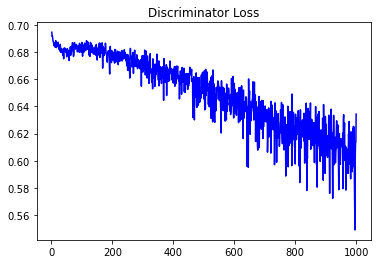

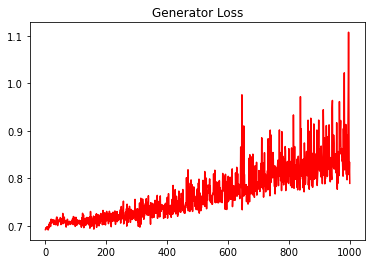

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.40965437873080374


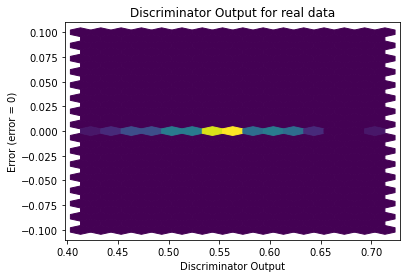

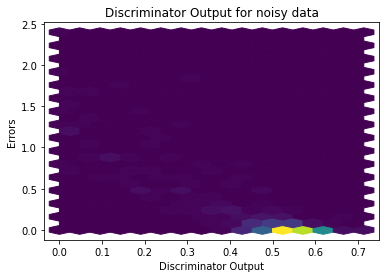

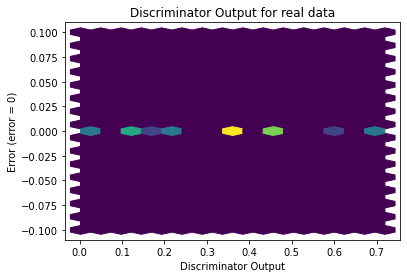

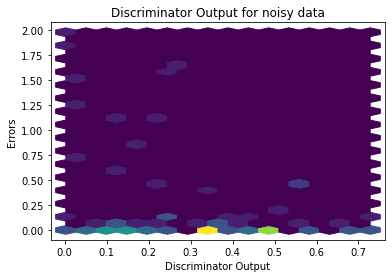

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


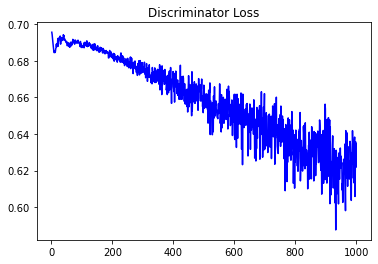

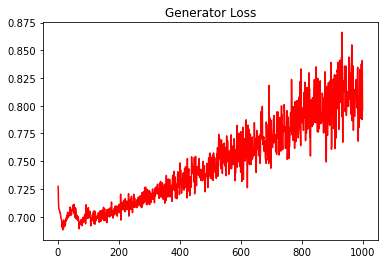

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.508169174965471


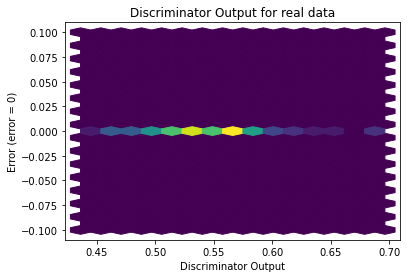

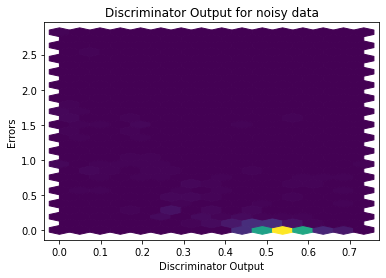

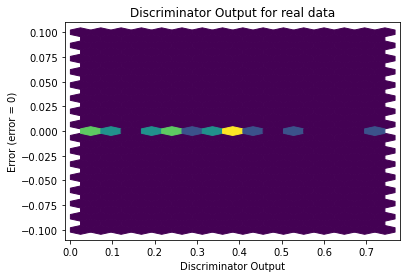

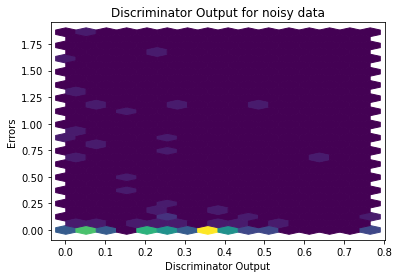

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1571]], requires_grad=True)
